In [46]:
bitErrorLoc = zeros(1, 10);
binDist1 = [451];
binDist2 = [139  963  698  940   23  812  203  635];
binDist3 = [25  27  27];

binDistBin = dec2bin(binDist1, 10);
for i = 1 : length(binDist1)
    binDistArrayTmp = str2num(binDistBin(i,: )')';
    bitErrorLoc = bitErrorLoc + binDistArrayTmp;
end

binDistBin = dec2bin(binDist2, 10);
for i = 1 : length(binDist2)
    binDistArrayTmp = str2num(binDistBin(i,: )')';
    bitErrorLoc = bitErrorLoc + binDistArrayTmp;
end

binDistBin = dec2bin(binDist3, 10);
for i = 1 : length(binDist3)
    binDistArrayTmp = str2num(binDistBin(i,: )')';
    bitErrorLoc = bitErrorLoc + binDistArrayTmp;
end

bitErrorLoc


bitErrorLoc =

     5     4     6     4     4     6     9     3     9     9




In [41]:
% Initialize the decimal list
binDist = [1005  1013  1004];

% Convert decimal numbers to binary strings of length 10
binVal = dec2bin(binDist, 10) - '0';

% Sum the binary digits for each column
bitErrorLoc = sum(binVal, 1);

% Display the result
disp(bitErrorLoc);

     3     3     3     3     3     1     2     3     0     2




In [44]:
bitErrorLoc = zeros(1, 10);
binDist1 = [451];
binDist2 = [900];
binDist3 = [1005  1013  1004];

binVal = dec2bin(binDist1, 10) - '0';
bitErrorLoc = bitErrorLoc + sum(binVal, 1);


binVal = dec2bin(binDist2, 10) - '0';
bitErrorLoc = bitErrorLoc + sum(binVal, 1);

binVal = dec2bin(binDist3, 10) - '0';
bitErrorLoc = bitErrorLoc + sum(binVal, 1);

bitErrorLoc

     0     1     1     1     0     0     0     0     1     1

     0     1     1     1     0     0     0     0     1     1

     1     1     1     0     0     0     0     1     0     0

     1     2     2     1     0     0     0     1     1     1

     1     1     1     1     1     0     1     1     0     1
     1     1     1     1     1     1     0     1     0     1
     1     1     1     1     1     0     1     1     0     0

     4     5     5     4     3     1     2     4     1     3


bitErrorLoc =

     4     5     5     4     3     1     2     4     1     3




In [8]:
result = cell(1, 10);
result


result =

  1x10 cell 数组

    {0x0 double}    {0x0 double}    {0x0 double}    {0x0 double}    {0x0 double}    {0x0 double}    {0x0 double}    {0x0 double}    {0x0 double}    {0x0 double}




In [6]:
binPos = [983,213,43,12,412,431,35,98];
binPosstr = num2str(binPos);
binPosstr = regexprep(binPosstr, '\s+', ' ');
binPosstr


binPosstr =

    '983 213 43 12 412 431 35 98'




In [167]:
clear;
fclose all;     %关闭所有matlab打开的文件

% 基本参数设置
sf = 10;
bw = 125e3;
samplesRate = 2e6;
debugPath = "terminal";
DebugLevel = 1;
DebugUtil = DebugUtil(DebugLevel, debugPath);

% 读取配置和验证文件`
[loraSet] = readLoraSet('GeneralConfig.json', sf, bw, samplesRate, 'C:\Users\ryon_\OneDrive\All_Project\LoRa_IDE\LoRaCode\NogChirp\Config\');
loraSet.payloadNum = 23;  % payload数目

%% 读取文件夹下所有采样值文件
fileDir = 'd:\data\Collision-2_CH-2\';
fileIn = dir(fullfile(fileDir, '*.sigmf-data'));
true_bin = importdata(strcat('C:\Users\ryon_\OneDrive\All_Project\LoRa_IDE\LoRaCode\NogChirp\Config\bin\NogSF', string(sf), '.txt'))';
% 从文件中读取信号流
[signal] = readSignalFile(fileDir, fileIn(1));

%% Decode
obj = VarCutChirpDecoder(loraSet, DebugUtil);
obj = obj.decode(signal);


INFO:初始化 VarCutChirpDecoder
	DEBUG: preambleBin: 949
	DEBUG: preambleEndPos: 9
	DEBUG: preamblePeak: 1501.5954
	DEBUG: CFO: 3658.2947
	DEBUG: winOffset: 741.5
	DEBUG: SFD Real Position: 11

	DEBUG: preambleBin: 52
	DEBUG: preambleEndPos: 9
	DEBUG: preamblePeak: 14.0472
	DEBUG: CFO: 3646.8506
	DEBUG: winOffset: 15086
	• WARNING: 找不到 SFD 的位置

	DEBUG: preambleBin: 889
	DEBUG: preambleEndPos: 15
	DEBUG: preamblePeak: 352.7475
	DEBUG: CFO: 3864.2883
	DEBUG: winOffset: 1667.5
	DEBUG: SFD Real Position: 17




In [154]:
obj.detectedPktAll = {};
readytoAdd = {1 949 9 1.5016e+03 11 3.6583e+03 741.5000 [12 43]};
obj.detectedPktAll = [obj.detectedPktAll; readytoAdd];
readytoAdd = {1, 321, 41, 352.7475, 43, 3.8643e+03, 1.6675e+03 [12 43]};
obj.detectedPktAll = [obj.detectedPktAll; readytoAdd];

In [164]:
numRows = size(obj.detectedPktAll, 1);
numRows



numRows =

     2




In [170]:
obj.detectedPktAll


ans =

  1x16 cell 数组

  列 1 至 12

    {[1]}    {[949]}    {[9]}    {[1.5016e+03]}    {[11]}    {[3.6583e+03]}    {[741.5000]}    {1x2490368 double}    {[1]}    {[889]}    {[15]}    {[352.7475]}

  列 13 至 16

    {[17]}    {[3.8643e+03]}    {[1.6675e+03]}    {1x2490368 double}




In [88]:
SFD = [11, 17, 25, 41];
for i = 1:length(SFD)
    for j = 1:length(SFD)
        if i == j
            continue;
        end
        diff_val = round((SFD(j) - 10)) - round((SFD(i) + 2.25));
        if diff_val + 1 <= 23 && diff_val + 1 + 8 >= 1
            disp([num2str(SFD(i)) '--- ' num2str(max(diff_val + 1, 1)) ' : ' num2str(min(diff_val + 1 + 8, 23))]);
        end
    end
end



ans =

   -12    -6     2    18




In [174]:
obj.detectedPktAll = {};
obj.detectedPktAll = [obj.detectedPktAll; {1, 949, 9, 1.5016e+03, 11, 3.6583e+03, 741.5000, [12 43]}];
obj.detectedPktAll = [obj.detectedPktAll; {1, 889, 15, 352.7475, 17, 3.8643e+03, 1.6675e+03, [12 43]}];
obj.detectedPktAll = [obj.detectedPktAll; {1, 667, 23, 352.7475, 25, 3.8643e+03, 1.6675e+03, [12 43]}];
obj.detectedPktAll = [obj.detectedPktAll; {1, 985, 39, 352.7475, 41, 3.8643e+03, 1.6675e+03, [12 43]}];
obj.detectedPktAll = [obj.detectedPktAll; {1, 321, 41, 352.7475, 43, 3.8643e+03, 1.6675e+03, [12 43]}];
% (Channel, preambleBin, preambleEndPos, preamblePeak, SFDPos, CFO, winOffset)

In [175]:
obj.detectedPktAll


ans =

  5x8 cell 数组

    {[1]}    {[949]}    {[ 9]}    {[1.5016e+03]}    {[11]}    {[3.6583e+03]}    {[  741.5000]}    {[12 43]}
    {[1]}    {[889]}    {[15]}    {[  352.7475]}    {[17]}    {[3.8643e+03]}    {[1.6675e+03]}    {[12 43]}
    {[1]}    {[667]}    {[23]}    {[  352.7475]}    {[25]}    {[3.8643e+03]}    {[1.6675e+03]}    {[12 43]}
    {[1]}    {[985]}    {[39]}    {[  352.7475]}    {[41]}    {[3.8643e+03]}    {[1.6675e+03]}    {[12 43]}
    {[1]}    {[321]}    {[41]}    {[  352.7475]}    {[43]}    {[3.8643e+03]}    {[1.6675e+03]}    {[12 43]}




In [198]:
tic;            % 打开计时器
numRows = size(obj.detectedPktAll, 1);
obj.binRm = cell(1, numRows);   % 创建一个cell数组
preamble_len = obj.loraSet.Preamble_length;
for i = 1:numRows
    rowofBinRm = cell(1, obj.loraSet.payloadNum);  % 存放每一行中需要 remove 的 preamble bin
    targetPktStartPos = round(obj.detectedPktAll{i, 5} + 2.25);
    cfoTmp = obj.detectedPktAll{i, 6};          % 目标信号的 cfo
    winOffsetTmp = obj.detectedPktAll{i, 7};    % 目标信号的 winOffset
    for j = 1:numRows
        if i == j
            continue;
        end
        otherPreambleStartPos = round(obj.detectedPktAll{j, 5} - 10);
        diff_val = otherPreambleStartPos - targetPktStartPos;
        overlapStartPos = max(diff_val + 1, 1);                % 重叠的开始位置
        overlapEndPos = min(diff_val + preamble_len + 1, 23);  % 重叠的结束位置
        overlapIndices = overlapStartPos:overlapEndPos;        % 重叠的位置
        binTmp = obj.detectedPktAll{j, 2};                     % 冲突信号的 preamble bin
        otherBin = mod(round(binTmp + cfoTmp / obj.loraSet.bw * obj.loraSet.fft_x ...
                 + round(winOffsetTmp) / obj.loraSet.dine * obj.loraSet.fft_x ...
                 + 0.25 * obj.loraSet.fft_x), obj.loraSet.fft_x); % 冲突信号在目标信号解码窗口的 preamble bin
        rowofBinRm(overlapIndices) = cellfun(@(x) [x otherBin], rowofBinRm(overlapIndices), 'UniformOutput', false);
    end
    obj.binRm{i} = rowofBinRm;
end
toc;

历时 0.000714 秒。



In [195]:
tic;
numRows = size(obj.detectedPktAll, 1);
obj.binRm = cell(1, numRows);   % 创建一个cell数组
preamble_len = obj.loraSet.Preamble_length;
for i = 1 : numRows
    rowofBinRm = cell(1, obj.loraSet.payloadNum);  % 存放每一行中需要 remove 的 preamble bin
    targetPktStartPos = round(obj.detectedPktAll{i, 5} + 2.25);
    for j = 1 : numRows
        if i == j
            continue;
        end
        otherPreambleStartPos = round(obj.detectedPktAll{j, 5} - 10);
        diff_val = otherPreambleStartPos - targetPktStartPos;
        if diff_val + 1 <= 23 && diff_val + preamble_len + 1 >= 1        % 如果目标信号数据包 和 冲突信号的 preamble 有重叠
            binTmp = obj.detectedPktAll{j, 2};          % 冲突信号的 preamble bin
            cfoTmp = obj.detectedPktAll{i, 6};          % 目标信号的 cfo
            winOffsetTmp = obj.detectedPktAll{i, 7};    % 目标信号的 winOffset
            otherBin = mod(round(binTmp + cfoTmp / obj.loraSet.bw * obj.loraSet.fft_x ...
                     + round(winOffsetTmp) / obj.loraSet.dine * obj.loraSet.fft_x ...
                     + 0.25 * obj.loraSet.fft_x), obj.loraSet.fft_x); % 冲突信号在目标信号解码窗口的 preamble bin
            overlapStartPos = max(diff_val + 1, 1);     % 重叠的开始位置
            overlapEndPos = min(diff_val + 1 + 8, 23);  % 重叠的结束位置
            for k = overlapStartPos : overlapEndPos
                rowofBinRm{k} = [rowofBinRm{k} otherBin];
            end
        end
    end
    obj.binRm{i} = rowofBinRm;
end
toc;

历时 0.000181 秒。




  列 1 至 13

    {[197]}    {[197]}    {[197 999]}    {[999]}    {[999]}    {[999]}    {[999]}    {[999]}    {[999]}    {[999]}    {[999]}    {0x0 double}    {0x0 double}

  列 14 至 23

    {0x0 double}    {0x0 double}    {0x0 double}    {0x0 double}    {0x0 double}    {[293]}    {[293]}    {[293 653]}    {[293 653]}    {[293 653]}

In [200]:
obj.binRm{1}
obj.binRm{2}
obj.binRm{3}
obj.binRm{4}
obj.binRm{5}


ans =

  1x23 cell 数组

  列 1 至 13

    {[197]}    {[197]}    {[197 999]}    {[999]}    {[999]}    {[999]}    {[999]}    {[999]}    {[999]}    {[999]}    {[999]}    {0x0 double}    {0x0 double}

  列 14 至 23

    {0x0 double}    {0x0 double}    {0x0 double}    {0x0 double}    {0x0 double}    {[293]}    {[293]}    {[293 653]}    {[293 653]}    {[293 653]}


ans =

  1x23 cell 数组

  列 1 至 12

    {[35]}    {[35]}    {[35]}    {[35]}    {[35]}    {0x0 double}    {0x0 double}    {0x0 double}    {0x0 double}    {0x0 double}    {0x0 double}    {0x0 double}

  列 13 至 23

    {[353]}    {[353]}    {[353 713]}    {[353 713]}    {[353 713]}    {[353 713]}    {[353 713]}    {[353 713]}    {[353 713]}    {[713]}    {[713]}


ans =

  1x23 cell 数组

  列 1 至 11

    {0x0 double}    {0x0 double}    {0x0 double}    {0x0 double}    {[353]}    {[353]}    {[353 713]}    {[353 713]}    {[353 713]}    {[353 713]}    {[353 713]}

  列 12 至 22

    {[353 713]}    {[353 713]}    {[713]}    {[713]}    {0x0 double

In [19]:
pkt_Num = length(obj.detectedPktAll);
binRm = cell(1, pkt_Num); % 创建一个2行23列的cell数组
disp(pkt_Num);
for i = 1 : pkt_Num
    rowofBinRm = cell(1,23);
    for j = 1 : pkt_Num
        if i == j
            continue;
        end
        diff_val = round(obj.detectedPktAll{j}(5) - 10) - round(obj.detectedPktAll{i}(5) + 2.25);
        if diff_val + 1 <= 23 && diff_val + 1 + 8 >= 1
            binTmp = obj.detectedPktAll{j}(2);
            cfoTmp = obj.detectedPktAll{i}(6);
            winOffsetTmp = obj.detectedPktAll{i}(7);
            otherBin = mod(round(binTmp + cfoTmp / obj.loraSet.bw * obj.loraSet.fft_x + round(winOffsetTmp) / obj.loraSet.dine * obj.loraSet.fft_x + 0.25 * obj.loraSet.fft_x), obj.loraSet.fft_x);
            for k = 1:23
                if k >= max(diff_val + 1, 1) && k <= min(diff_val + 1 + 8, 23)
                    rowofBinRm{k} = [rowofBinRm{k} otherBin];
                end
            end
            % rowofBinRm{i} = rowofBinRm{i} = [rowofBinRm{i} [197]];
            % binRm{i, j} = [otherBin, max(diff_val + 1, 1), min(diff_val + 1 + 8, 23)];
            % disp(otherBin);
            disp([num2str(obj.detectedPktAll{i}(5)) '---' num2str(max(diff_val + 1, 1)) ' : ' num2str(min(diff_val + 1 + 8, 23)) '---' num2str(otherBin)]);
            % disp(rowofBinRm)
        end
    end
    binRm{i} =  rowofBinRm;
end

% Remove empty cells from binRm
% binRm = binRm(~cellfun('isempty', binRm));
binRmTmp = binRm{1};

Binrecord = [197, 810, 999];
Binrecord
Binrecord = setdiff(Binrecord, binRmTmp{3});
Binrecord

     5

11---1 : 3---197
11---3 : 11---999
11---19 : 23---293
11---21 : 23---653
17---1 : 5---35
17---13 : 21---353
17---15 : 23---713
25---5 : 13---353
25---7 : 15---713

Binrecord =

   197   810   999


Binrecord =

   810




In [320]:
Binrecord = [1.51, 2.31, 0.41; 197, 810, 999];
Binrecord
a = [197, 999, 765];
for i = 1:length(a)
    Binrecord(:, Binrecord(2, :) == a(i)) = [];  % 去除其它包的 preamble 值
end

% 使用 setdiff 去除与数组 a 中相同的值
% Binrecord(2, :) = setdiff(Binrecord(2, :), a);
Binrecord


Binrecord =

    1.5100    2.3100    0.4100
  197.0000  810.0000  999.0000


Binrecord =

    1.5100    2.3100    0.4100
  197.0000  810.0000  999.0000




In [7]:

emptySignal = zeros(1, 1000); % create an array of zeros with the specified length
paddedSignal = [emptySignal signal]; % concatenate the empty signal with the original signal
length(paddedSignal)



ans =

     2491368




16384=0.008192*2e6

In [24]:
obj = obj.clear();
obj.preambleSignal = signal;
emptyLength = 100; % specify the length of empty values
emptySignal = zeros(emptyLength, 1); % create an array of zeros with the specified length
paddedSignal = [emptySignal; signal]; % concatenate the empty signal with the original signal
obj = obj.clear();
obj.preambleSignal = paddedSignal;


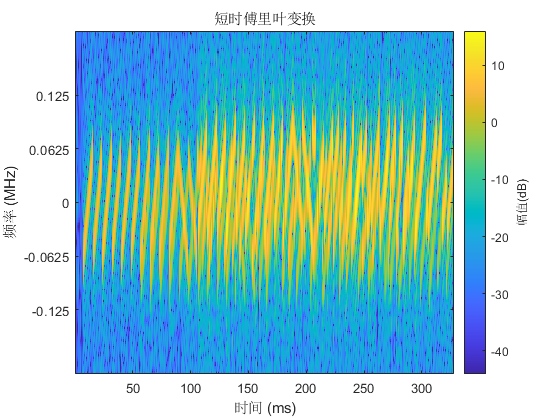

In [4]:
stft(signal(1:40*obj.loraSet.dine), obj.loraSet.sample_rate, 'Window',kaiser(64,2),'OverlapLength',32,'FFTLength',obj.loraSet.fft_x);
% stft(signal(40*dine+1:100*dine), sample_rate, 'Window',rectwin(64),'OverlapLength',32,'FFTLength',fft_x);
ylim([-0.2, 0.2]);
yticks(-125e3/1e6 : 125e3/1e6/2 : 125e3/1e6);

In [10]:
len = length(signal);
len/obj.loraSet.dine


ans =

   152




In [ ]:
823+148=971


a =

   996




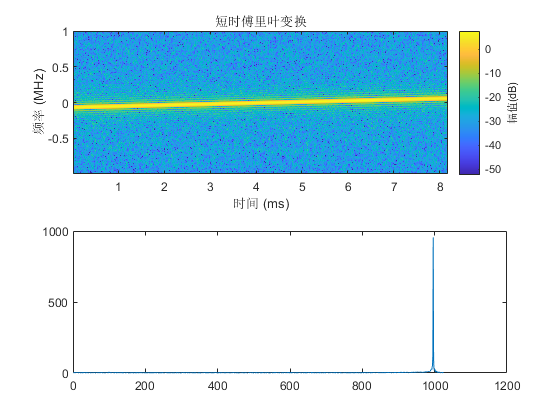

In [39]:
offset = 0;  % 2793,19610
preambleSignalTemp = circshift(obj.preambleSignal, -round(offset));
Ts = 1;
signal_tmp = preambleSignalTemp((Ts - 1) * obj.loraSet.dine + 1: Ts * obj.loraSet.dine);
dechirp = signal_tmp .* obj.idealDownchirp;  % 823, 148
dechirp_fft = abs(fft(dechirp, obj.loraSet.dine));
dechirp_fft = dechirp_fft(1 : obj.loraSet.fft_x) + dechirp_fft(obj.loraSet.dine - obj.loraSet.fft_x + 1 : obj.loraSet.dine);
subplot(211)
stft(signal_tmp, obj.loraSet.sample_rate, 'Window',kaiser(64,2),'OverlapLength',32,'FFTLength',obj.loraSet.fft_x);
subplot(212)
plot(dechirp_fft);
[~ , a] = max(dechirp_fft);
a
% Sum = sum(dechirp_fft)
% signalOut = obj.findpeaksWithShift(dechirp_fft, obj.loraSet.fft_x); % 找峰值
% [pos] = signalOut(2,:);
% pos(1:7)
% std2(dechirp_fft)

In [56]:
candidate = zeros(1, obj.loraSet.Preamble_length + 2);

for t = 1 : obj.loraSet.Preamble_length + 4
    signal_tmp = obj.preambleSignal((t - 1) * obj.loraSet.dine + 1 : t * obj.loraSet.dine);
    dechirp = signal_tmp .* obj.idealDownchirp;
    dechirp_fft = abs(fft(dechirp, obj.loraSet.dine));
    dechirp_fft = dechirp_fft(1 : obj.loraSet.fft_x) + dechirp_fft(obj.loraSet.dine - obj.loraSet.fft_x + 1 : obj.loraSet.dine);
    [~, candidate(t)] = max(dechirp_fft);
end

In [25]:
% 检测 preamble，确定存在 preamble 并且获得最后一个 preamble 出现的窗口和 preamble 数目
obj = obj.detectPreambleBinBehind();
% 通过 preamble 和 SFD 的 bin 来计算 CFO 和 winoffset
obj = obj.getcfoWinoff();
% 调整信号的 winoffset
obj.preambleSignal = circshift(obj.preambleSignal, -round(obj.winOffset));
% 根据 cfo 重新生成带有 decfo 的 idealchirp，用于解调
obj = obj.rebuildIdealchirpCfo(0);
obj = obj.getSFDPos();

In [26]:
obj = obj.NogSingleDecode();

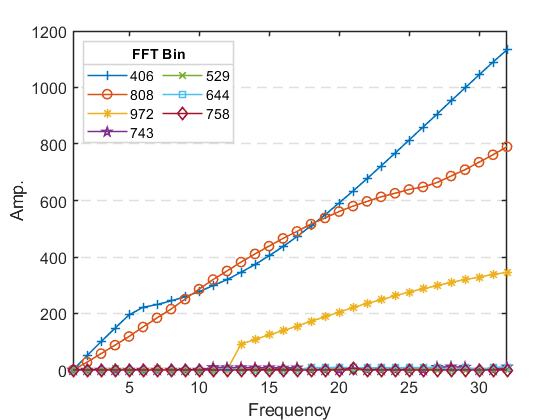

In [27]:
markers = {'+', 'o', '*', 'pentagram', 'x', 'square', 'diamond', 'v', '^', '>', '<', '.', 'hexagram', '_', 'none'};

for i = 1 : 7
    plot(obj.MWindowRecord(i,:), 'LineWidth', 1.2, 'Marker', markers(i), 'MarkerSize', 7);
    hold on;
end
% 设置字体大小
ax = gca;
ax.FontSize = 12;
% 设置网格线, YGrid: y轴网格线, GridLineStyle: 网格线样式, YMinorGrid: y轴次网格线
set(gca, 'YGrid', 'on', 'GridLineStyle', '--', 'YMinorGrid', 'off');
% 设置边框宽度
set(gca, 'linewidth', 1.2);
% 设置坐标轴范围
xlim([1, 32]);
% 设置坐标轴标签
xlabel('Frequency');
ylabel('Amp.');
% 添加图例, location: 位置, NumColumns: 列数, EdgeColor: 边框颜色
lgd = legend(cellstr(num2str(obj.fftBinRecord')), 'Location', 'northwest', 'NumColumns', 2, 'EdgeColor', '#d5d5d5');
% 直接修改只读属性 Title
lgdTitleHandle = get(lgd, 'Title');
set(lgdTitleHandle, 'String', 'FFT Bin');
% saveas(gcf, 'Methods.png');

In [42]:
obj.preambleBin


ans =

    98




In [58]:
obj.preambleEndPos


ans =

     []




In [54]:
disp(obj.decode(signal).binRecord);

  列 1 至 13

         810        1010         386         614         850         406         126        1022         367         677         347         284          27

  列 14 至 23

         551         991         990          49         827         822          85         265         587         421


